In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
claimants =pd.read_csv("claimants.csv")
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [3]:
claimants.shape

(1340, 7)

In [47]:
claimants.drop(["CASENUM"],inplace =True,axis =1) # axis =1 for column
# here we  frop the case num because it is not useful for the our target prediction

KeyError: "['CASENUM'] not found in axis"

In [9]:
claimants.shape

(1340, 6)

In [11]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [12]:
claimants =claimants.dropna()

In [14]:
claimants.shape

(1096, 6)

In [19]:
# dividing our data into the input and output variables
X =claimants.iloc[:,1:] # this is for the feature column
y =claimants.iloc[:,0] # this is for the target column

In [20]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [21]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [23]:
classifier =LogisticRegression() # classifier is a instance 
classifier.fit(X,y)

LogisticRegression()

In [24]:
y_pred = classifier.predict(X)

In [26]:
y_pred # this is the predicted values for y

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [28]:
pred =pd.DataFrame({'y':y,
                   'yhat':y_pred}) 

In [30]:
pred

,y,yhat
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [31]:
# here we import the confusion matrix to check the accuracy of the model

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(y,y_pred)

In [34]:
print(confusion_matrix) # accuracy of the model

[[381 197]
 [123 395]]


In [37]:
#ROC

In [39]:
from sklearn.metrics import roc_curve # receiver operating characteristics = roc
from sklearn.metrics import roc_auc_score # auc = area under curve

In [42]:
fpr,tpr,thresholds =roc_curve(y,classifier.predict_proba(X)[:,1]) # calculate the probabilities of all features or x variables
#[:,1] =gives the probability for only 1st row
# fpr =false positive rate
# tpr =true positive rate
auc =roc_auc_score(y,y_pred)

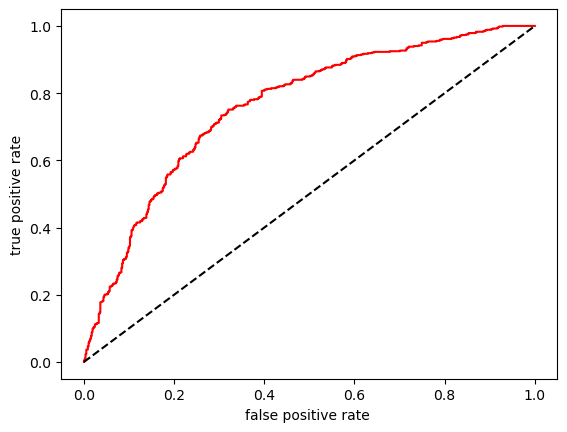

In [44]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color ='red')
plt.plot([0,1],[0,1],'k--') # x axis ranges from 0 to 1 also y from 0 to 1
plt.xlabel("false positive rate ")
plt.ylabel("true positive rate")
plt.show()


In [46]:
auc # auc give us the area under curve # this is our accuracy

0.7108589063606365